## <span style="color:darkblue">**Лабораторная работа 2. Генетические алгоритмы. Задание**</span> 

### <span style="color:darkred">**Пожалуйста соблюдайте следующее наименование Ваших проектов:**</span> 

**L**[Номер Лабораторной Работы]**N**[Ващ Номер по Списку]**.ipynb**.

**Например:** L2N1.ipynb

### Подключение библиотеки к своему проекту:

In [1]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import random

# установка вывода графиков в окне jupiter
%matplotlib inline

Импортируем необходимые пакеты по генетическим алгоритмам:

In [2]:
from deap import base
from deap import creator
from deap import tools

## Практическое задание 1

<span style="color:darkred">**Решить задачу поисковой оптимизации с применение кода CMA-ES на ландшафтных функциях:** </span>

**1. Функция Растригина** — невыпуклая функция, предложена в 1974 году Леонардом Растригиным как функция двух переменных и в 1991 году была обобщена на высшие размерности. Нахождение минимума этой функции является достаточно трудной задачей из-за большой области поиска и большого количества локальных минимумов:

$$f(x,y)=2*A+(x^2-A*cos(2\pi*x))+(y^2-A*cos(2\pi*y))\rightarrow min,\;A=10,\;x,y\in\left[-5.12;5.12\right]$$

**2. Функция Розенброка** (англ. Rosenbrock function, Rosenbrock's valley, Rosenbrock's banana function) — невыпуклая функция, предложенная Ховардом Розенброком (англ.) в 1960 году. Считается, что поиск глобального минимума для данной функции является нетривиальной задачей. Каноническое определение:

$$f(x,y)=(1-x)^2+100*(y-x^2)^2\rightarrow min,\;x,y\in[-\infty,\infty]$$

**3. Функция Химмельблау** (анг. Himmelblau) — мультимодальная функция двух переменных. Функция названа в честь Дэвида Мотнера Химельблау (1924—2011), который впервые её использовал. Определяется формулой:

$$f(x,y)=(x^2 + y - 11)^2 + (x + y^2 - 7)^2\rightarrow min,\;x,y\in\left[-5;5\right]$$

**4. Функция Де Янга** (анг. De Jong). Определяется формулой (**max**):

$$f(x,y)=3905.93-100*(x^2-y^2)^2-(1-x)^2 \rightarrow max,\;x,y\in\left[-2.048;2.048\right]$$


**5. Функция Стенгера** (анг. Stenger). Определяется формулой:

$$f(x,y)=(x^2-4y)^2+(x^2-2x+4y)^2 \rightarrow min,\;x,y\in\left[-1;4\right]$$

**6. Функция Мартина и Гадди** (анг. Martin, Gaddy). Определяется формулой:

$$f(x,y)=(x-y)^2+((x+y-10)/3)^2 \rightarrow min,\;x,y\in\left[-10;10\right]$$

**7. Функция Экли** (анг. Ackley). Определяется формулой:

$$f(x,y)=-20*e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(cos(2\pi*x)+cos(2\pi*y))} + 20 + e \rightarrow min,\;x,y\in\left[-100;100\right]$$

## Небольшая заготовка для выполнения Вашего задания:

### CMA-ES

Эволюционная стратегия с адаптацией матрицы ковариации (CMA-ES). Алгоритм CMA-ES был разработан Николасом Хансеном для решения сложных, нелинейных, невыпуклых задач типа "черный ящик" в непрерывном пространстве поиска. Особенность CMA-ES заключается в том, что на каждом поколении происходит перерасчет матрицы ковариации, которая непосредственно влияет на размер и форму области, где будут генерироваться будущие потенциальные решения. 

Данный алгоритм показал очень хорошую способность к сходимости на большом количестве задач, включая неразрывные, мультимодальные и сильно зашумленные функции. Однако данный алгоритм имеет высокую вычислительную сложность $O(n^2)$ за одно вычисление функции, где $n$ — размерность области определения целевой функции.

<center><img src="CMA_ES.jpg"></center>

Рассмотрим вопрос минимизации функции Бута:
$$F(x,y)=(x+2y-7)^2 + (x2+y-5)^2 \rightarrow min,\;где\;x,y\in\left[-10;10\right]$$

Минимум в точке (1, 3).

**Определим функцию:**

In [3]:
# определение функции
def FRose(x, y):
    return (1.0 - x)**2 +(100.0 * (y - x * x)**2);

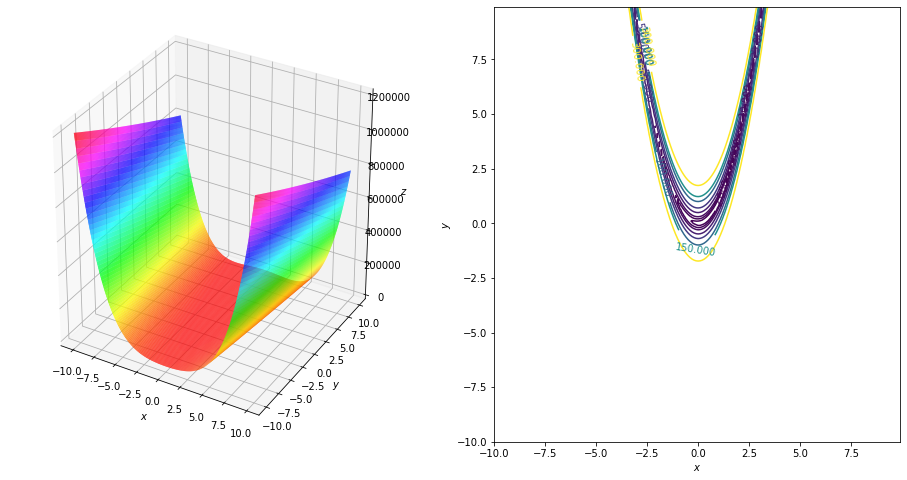

In [4]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# определение данных
X = np.arange(-10, 10, .1)
Y = np.arange(-10, 10, .1)
X, Y = np.meshgrid(X, Y)

Z = FRose(X,Y)

# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# вывод функции (1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# построение поверхности
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hsv, 
                       linewidth=0, antialiased=True)

# вывод функции (2)
ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300])

# добавление подписей к линиям уровня
ax.clabel(cs)

plt.show()

In [5]:
# определение функции
def FRose(individual):
    x = individual[0];
    y = individual[1];
    
    return (1.0 - x)**2 +(100.0 * (y - x * x)**2),

In [6]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import cma
from deap import creator
from deap import tools

# Problem size
N=2;

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("evaluate", FRose)

def main():
    # The cma module uses the numpy random number generator
    np.random.seed(128)

    # The CMA-ES algorithm takes a population of one individual as argument
    # The centroid is set to a vector of 5.0
    strategy = cma.Strategy(centroid=[5.0]*N, sigma=5.0, lambda_=20*N)
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    #logger = tools.EvolutionLogger(stats.functions.keys())
   
    # The CMA-ES algorithm converge with good probability with those settings
    pop, logbook = algorithms.eaGenerateUpdate(toolbox, ngen=55, stats=stats, halloffame=hof, verbose = False)
    
    return pop, logbook, hof

In [7]:
pop, stats, hof = main();

In [8]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

Best individual is [0.9999999989064149, 0.999999998006995], (4.9659424165421285e-18,)


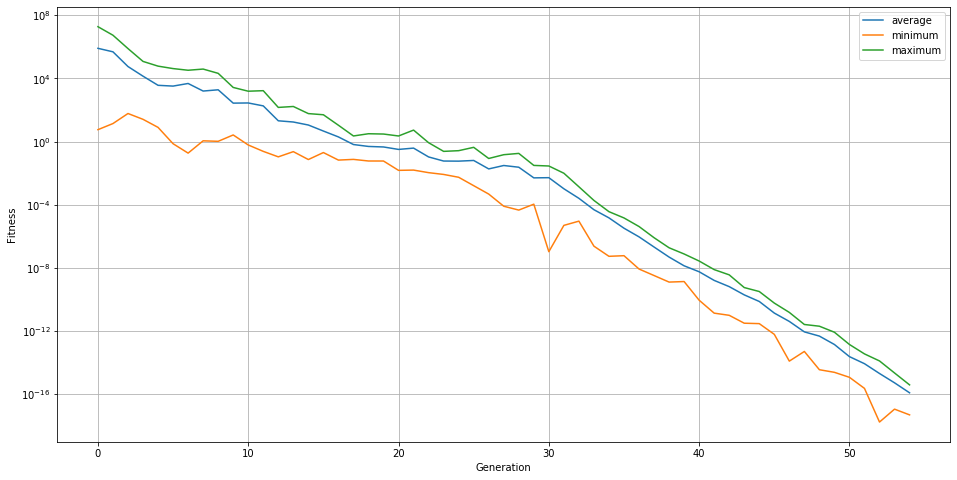

In [9]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

gen, avg, min_, max_ = stats.select("gen", "avg", "min", "max")
plt.semilogy(gen, avg, label="average")
plt.semilogy(gen, min_, label="minimum")
plt.semilogy(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend(loc="upper right")
plt.grid()
plt.show()

## Практическое задание 2

### На выбор: решение задачи 2 или 3

<span style="color:darkred">**2. Реализовать задачу упаковки в контейнеры** </span>

**Задача об упаковке в контейнеры** — задача комбинаторной оптимизации. Задача заключается в упаковке объектов предопределённой формы в конечное число контейнеров предопределённой формы таким способом, чтобы число использованных контейнеров было наименьшим или количество или объём объектов (которые упаковывают) были наибольшими.

<center><img src="BinPacking.jpg"></center>

**Примечание:** для упрощения задачи - все контейнеры одинаковые

<span style="color:darkred">**3. Реализовать задачу о рюкзаке** </span>

Задача о рюкзаке (или задача о ранце) — задача комбинаторной оптимизации. Своё название получила от конечной цели: уложить как можно большее число ценных вещей в рюкзак при условии, что вместимость рюкзака ограничена. С различными вариациями задачи о рюкзаке можно столкнуться в экономике, прикладной математике, криптографии и логистике.

В общем виде задачу можно сформулировать так: из заданного множества предметов со свойствами "стоимость" и "вес" требуется отобрать подмножество с максимальной полной стоимостью, соблюдая при этом ограничение на суммарный вес.

In [21]:
#Задача о рюкзаке
from itertools import combinations

items = (
   ('Кубик 1', 1, 2),
   ('Кубик 2', 2, 3),
   ('Кубик 3', 3, 5),
   ('Кубик 4', 4, 6),
   ('Кубик 5', 5, 7),
   ('Кубик 6', 6, 9),
)

total_volume = 0
for item in items:
   total_volume += item[1]

VOLUME = 20


def calcBackPackVol(backpack):
   total_volume = 0
   for item in backpack:
       total_volume += item[1]

   return total_volume


def calcBackPackCost(backpack):
   total_cost = 0
   for item in backpack:
       total_cost += item[2]

   return total_cost


print("в распоряжении {} предметов общим объемом {} л,\
которые необходимо уложить в рюкзак {} литров".\
     format(len(items), total_volume, VOLUME))


counter = 0
max_cost = 0
result_items = []
result_costs = []

for num in range(1, len(items) + 1):
   for i, combination in enumerate(combinations(items, num), 1):
       current_volume = calcBackPackVol(combination)
       current_cost = calcBackPackCost(combination)
       if current_volume <= VOLUME and current_cost >= max_cost:
           counter += 1
           max_cost = current_cost
           result_items.append(combination)
           result_costs.append(current_cost)
           print("комбинация {} набрала цену {} и объем {:3.2f} л: {}".\
                 format(counter, current_cost, current_volume, combination))

max_cost_count = result_costs.count(max_cost)

print("удалось {} раз добиться максимальной ценности {}".\
     format(max_cost_count, max_cost))


best_result = result_items[result_costs.index(max_cost)]

# print(best_result)
#print(calcBackPackVol(best_result))

[print(item) for item in best_result]

в распоряжении 6 предметов общим объемом 21 л,которые необходимо уложить в рюкзак 20 литров
комбинация 1 набрала цену 2 и объем 1.00 л: (('Кубик 1', 1, 2),)
комбинация 2 набрала цену 3 и объем 2.00 л: (('Кубик 2', 2, 3),)
комбинация 3 набрала цену 5 и объем 3.00 л: (('Кубик 3', 3, 5),)
комбинация 4 набрала цену 6 и объем 4.00 л: (('Кубик 4', 4, 6),)
комбинация 5 набрала цену 7 и объем 5.00 л: (('Кубик 5', 5, 7),)
комбинация 6 набрала цену 9 и объем 6.00 л: (('Кубик 6', 6, 9),)
комбинация 7 набрала цену 9 и объем 6.00 л: (('Кубик 1', 1, 2), ('Кубик 5', 5, 7))
комбинация 8 набрала цену 11 и объем 7.00 л: (('Кубик 1', 1, 2), ('Кубик 6', 6, 9))
комбинация 9 набрала цену 12 и объем 8.00 л: (('Кубик 2', 2, 3), ('Кубик 6', 6, 9))
комбинация 10 набрала цену 12 и объем 8.00 л: (('Кубик 3', 3, 5), ('Кубик 5', 5, 7))
комбинация 11 набрала цену 14 и объем 9.00 л: (('Кубик 3', 3, 5), ('Кубик 6', 6, 9))
комбинация 12 набрала цену 15 и объем 10.00 л: (('Кубик 4', 4, 6), ('Кубик 6', 6, 9))
комбинация 

[None, None, None, None, None]

<center><img src="KnapsackProblem.jpg"></center>

## Небольшая заготовка для выполнения Вашего задания:

In [11]:
import random

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

IND_INIT_SIZE = 5
MAX_ITEM = 50
MAX_WEIGHT = 50
NBR_ITEMS = 20

# To assure reproductibility, the RNG seed is set prior to the items
# dict initialization. It is also seeded in main().
random.seed(12345)

# Create the item dictionary: item name is an integer, and value is 
# a (weight, value) 2-uple.
items = {}
# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
    items[i] = (random.randint(1, 10), random.uniform(0, 100))
    
# Attribute generator
toolbox.register("attr_item", random.randrange, NBR_ITEMS)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_item, IND_INIT_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 
def evalKnapsack(individual):
    weight = 0.0
    value = 0.0

    return weight, value

# функция скрещевания
def cxSet(ind1, ind2):
    return ind1, ind2

# функция мутации
def mutSet(individual):
    return individual,

toolbox.register("evaluate", evalKnapsack)
toolbox.register("mate", cxSet)
toolbox.register("mutate", mutSet)
toolbox.register("select", tools.selTournament, tournsize=3)
# вот тут код
def evalKnapsack(individual):
    weight = 0.0
    value = 0.0
    for item in individual:
        weight += items[item][0]
        value += items[item][1]
    if len(individual) > MAX_ITEM or weight > MAX_WEIGHT:
        return 10000, 0 

    return weight, value

# функция скрещевания 
# и тут
def cxSet(ind1, ind2):
    temp = set(ind1)                # Used in order to keep type
    ind1 &= ind2                    # Intersection (inplace)
    ind2 ^= temp                    # Symmetric Difference (inplace)
    return ind1, ind2

# функция мутации и тут тоже
def mutSet(individual):
    """Mutation that pops or add an element."""
    if random.random() < 0.5:
        if len(individual) > 0:     # We cannot pop from an empty set
            individual.remove(random.choice(sorted(tuple(individual))))
    else:
        individual.add(random.randrange(NBR_ITEMS))
    return individual,

toolbox.register("evaluate", evalKnapsack)
toolbox.register("mate", cxSet)
toolbox.register("mutate", mutSet)
# в шаблоне было так
#toolbox.register("select", tools.selTournament, tournsize=3)
# а в примере так
toolbox.register("select", tools.selNSGA2)

def main():
    NGEN = 50
    MU = 50
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.2
    
    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    
    algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                              halloffame=hof)

    return pop, stats, hof

/opt/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [15]:
best_ind = tools.selBest(hof, 1)[0]
print (best_ind)

[0.9999999994936708, 0.9999999988651724]


## Небольшая заготовка для выполнения Вашего задания (при использование ES):

## Задача о покупке на заданную сумму

<center><img src="xkcd.jpg"></center>

Какие напитки надо купить, чтобы сумма покупки соответствовала заданной и время приготовления напитков было минимальным.

xkcd comics: http://xkcd.com/287/

In [31]:
import random
from operator import attrgetter
from collections import Counter

# We delete the reduction function of the Counter because it doesn't copy added
# attributes. Because we create a class that inherit from the Counter, the
# fitness attribute was not copied by the deepcopy.
# del Counter.__reduce__

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [32]:
IND_INIT_SIZE = 3

# Create the item dictionary: item id is an integer, and value is 
# a (name, weight, value) 3-uple. Since the comic didn't specified a time for
# each menu item, random was called to generate a time.
ITEMS_NAME = "Mixed Fruit", "French Fries", "Side Salad", "Hot Wings", "Mozzarella Sticks", "Sampler Plate"
ITEMS_PRICE = 2.15, 2.75, 3.35, 3.55, 4.2, 5.8
ITEMS = dict((name, (price, random.uniform(1, 5))) for name, price in zip(ITEMS_NAME, ITEMS_PRICE))

In [33]:
creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", Counter, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("attr_item", random.choice, ITEMS_NAME)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_item, IND_INIT_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalXKCD(individual, target_price):
    """Evaluates the fitness and return the error on the price and the time
    taken by the order if the chef can cook everything in parallel."""
    price = 0.0
    times = list()
    for item, number in individual.items():
        price += ITEMS[item][0] * number
        times.append(ITEMS[item][1])
    return abs(price - target_price), max(times)

def cxCounter(ind1, ind2, indpb):
    """Swaps the number of perticular items between two individuals"""
    for key in ITEMS.keys():
        if random.random() < indpb:
            ind1[key], ind2[key] = ind2[key], ind1[key]
    return ind1, ind2

def mutCounter(individual):
    """Adds or remove an item from an individual"""
    if random.random() > 0.5:
        individual.update([random.choice(ITEMS_NAME)])
    else:
        val = random.choice(ITEMS_NAME)
        individual.subtract([val])
        if individual[val] < 0:
            del individual[val]
    return individual,

toolbox.register("evaluate", evalXKCD, target_price=15.05)
toolbox.register("mate", cxCounter, indpb=0.5)
toolbox.register("mutate", mutCounter)
toolbox.register("select", tools.selNSGA2)

In [34]:
def main():
    NGEN = 40
    MU = 100
    LAMBDA = 200
    CXPB = 0.3
    MUTPB = 0.6

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    
    price_stats = tools.Statistics(key=lambda ind: ind.fitness.values[0])
    time_stats = tools.Statistics(key=lambda ind: ind.fitness.values[1])
    stats = tools.MultiStatistics(price=price_stats, time=time_stats)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)

    algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN,
                              stats, halloffame=hof, verbose = False)

    return pop, stats, hof

In [35]:
pop, stats, hof = main()

In [36]:
for i in ITEMS:
    print ('%20s:\t цена:%.02f время:%.02f' % (i, ITEMS[i][0], ITEMS[i][1]));

         Mixed Fruit:	 цена:2.15 время:2.50
        French Fries:	 цена:2.75 время:4.84
          Side Salad:	 цена:3.35 время:3.38
           Hot Wings:	 цена:3.55 время:4.65
   Mozzarella Sticks:	 цена:4.20 время:2.32
       Sampler Plate:	 цена:5.80 время:1.16


In [61]:
best_ind = tools.selBest(hof, 1)[0]
print (best_ind)

Individual({'Hot Wings': 2, 'Mixed Fruit': 1, 'Sampler Plate': 1, 'Mozzarella Sticks': 0})


In [62]:
p, t = 15.05 - evalXKCD(best_ind, 15.05)[0], evalXKCD(best_ind, 15.05)[1]
print("Best individual is %s, %s time:%.2f" % (best_ind, p, t))

Best individual is Individual({'Hot Wings': 2, 'Mixed Fruit': 1, 'Sampler Plate': 1, 'Mozzarella Sticks': 0}), 15.05 time:2.85
